# Coin Flipping Exercise

## Import Libraries

In [1]:
using Distributions
using StatsPlots
using Turing

## Generate Prior Probability

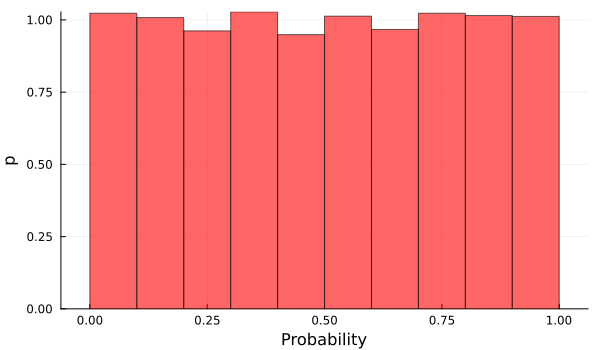

In [2]:
p_prior_values = rand(Uniform(0,1),10000);
histogram(p_prior_values, normalized=true,bins=10, xlabel="Probability",ylabel="p",legend=false,alpha=0.6,color="red",size=(600,350))

# Binomial Distribution

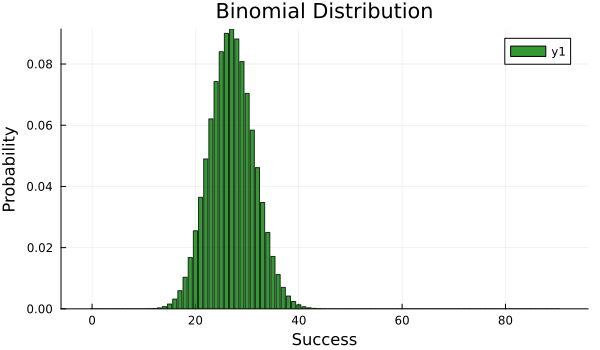

In [3]:
N = 90
p = 0.3
bar(Binomial(N,p),xlabel="Success",ylabel="Probability",title="Binomial Distribution",color="green",alpha=0.8,size=(600,350))

# Turing Model

In [5]:
@model coinflip(y) = begin
    # Our prior belief about the probability of heads in a coin
    p ~ Uniform(0,1)
    
    #the number of observations
    N = length(y)
    
    for n in 1:N
        #Heads or tails are drawn from a Bernoulli distribution
        y[n] ~ Bernoulli(p)
    end
end

coinflip (generic function with 2 methods)

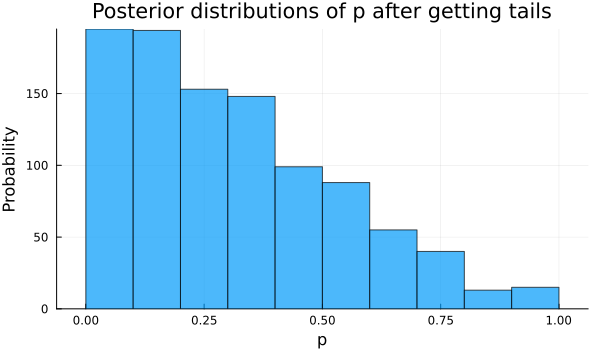

In [6]:
outcome = [0, 1, 1, 0, 1, 0, 0, 1, 1, 1]

#Settings of the Hamiltonian's Monte Carlo (HMC) Sampler
iterations = 1000
ϵ = 0.05
τ = 10

# Start sampling
chain = sample(coinflip(outcome[1]), HMC(ϵ, τ), iterations, progress=false)

histogram(chain[:p],legend = false, xlabel="p",ylabel="Probability",title="Posterior distributions of p after getting tails",size=(600,350),alpha=0.7)

In [7]:
samples = []
for i in 2:10
    global chain_
    chain_ = sample(coinflip(outcome[1:i]), HMC(ϵ,τ),iterations,progress = false)
    push!(samples,chain_[:p])
end

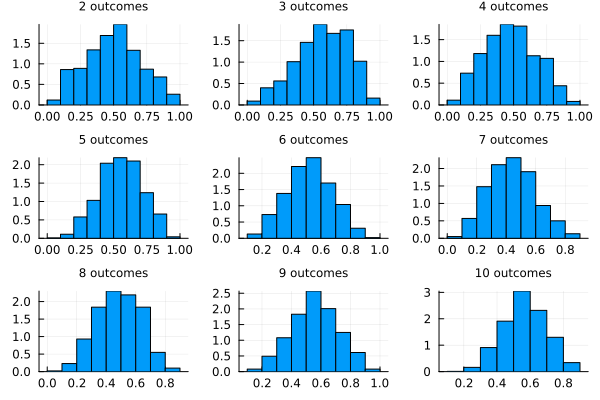

In [8]:
plots_ = [histogram(samples[i],normalized=true,legend=false,bins=10,title="$(i+1) outcomes",titlefont=font(8)) for i in 1:9];
plot(plots_...)

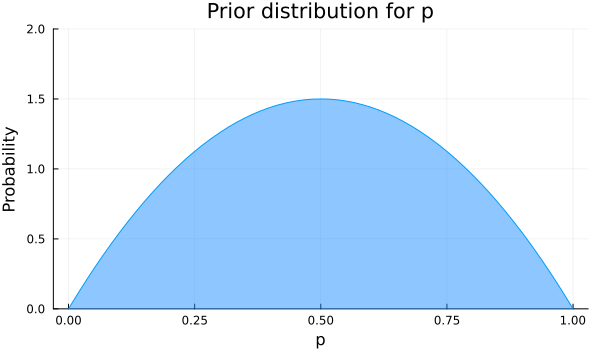

In [9]:
plot(Beta(2,2), legend=false, xlabel="p", ylabel="Probability", title="Prior distribution for p", fill=(0, .5,:dodgerblue), ylim=(0,2), size=(600, 350))

In [10]:
@model coinflip_beta_prior(y) = begin
    
    # Our prior belief about the probability of heads in a coin
    p ~ Beta(2,2)
    
    #The number of observations
    N =  length(y)
    for n in 1:N
        y[n] ~ Bernoulli(p)
    end
end


coinflip_beta_prior (generic function with 2 methods)

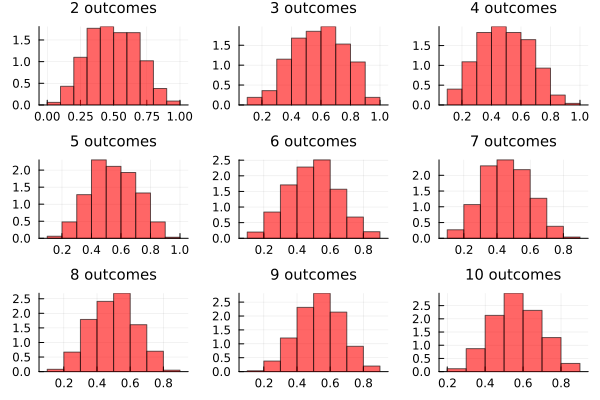

In [11]:
samples_beta_prior =[]
for i in 2:10
    global chain_
    chain_ = sample(coinflip_beta_prior(outcome[1:i]),HMC(ϵ,τ),iterations,progress=false)
    push!(samples_beta_prior,chain_[:p])
end

plots = [histogram(samples_beta_prior[i],normalized=true,legend=false,bins =10,title="$(i+1) outcomes",titlefont = font(10),color="red",alpha=0.6) for i in 1:9]
plot(plots...)

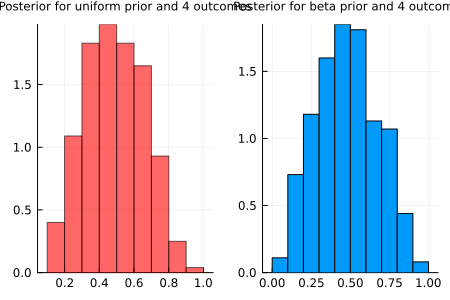

In [12]:
plot(plots[3], plots_[3], title = ["Posterior for uniform prior and 4 outcomes" "Posterior for beta prior and 4 outcomes"], titleloc = :center, titlefont = font(8), layout=2, size=(450, 300))
